# Multiple Features Regression

<a name="1"></a>
## Packages 

First, let's run the cell below to import all the packages that you will need during this assignment.
- [numpy](www.numpy.org) is the fundamental package for working with matrices in Python.
- [matplotlib](http://matplotlib.org) is a famous library to plot graphs in Python.
- ``utils.py`` contains helper functions for this assignment. You do not need to modify code in this file.


In [263]:
import numpy as np
import matplotlib.pyplot as plt
from utils import load_data_multi
import copy

## Problem 

** we are trying to estimate price of houses using mutiple features of houses.**


## Training Data

we will start by loading the dataset for this task. 
- The `load_data_multi()` function shown below loads the data into variables `x_train` and `y_train`
  - `x_train` is the 2d of the features of the houses which are `size of the house in square feet` and `number of rooms in the house`
  - `y_train` is the price of the houses.  
  - Both `X_train` and `y_train` are numpy arrays.


In [264]:
# load the dataset
x_train, y_train = load_data_multi()

#### Applying feature scaling to the training data

The training data range for both features are now the same `[0 : 5]`


In [265]:
y_train /= 1000
x_train[:,0] /= 1000 

print(f'Range of first feature (house size) :{np.max(x_train[:,0])-np.min(x_train[:,0])}')
print(f'Range of second feature (number of rooms) :{np.max(x_train[:,1])-np.min(x_train[:,1])}')

Range of first feature (house size) :3.626
Range of second feature (number of rooms) :4.0


In [266]:
# print x_train
print("Type of x_train:",type(x_train))
print("First 10 elements of x_train are:\n", x_train[:10]) 

Type of x_train: <class 'numpy.ndarray'>
First 10 elements of x_train are:
 [[2.104 3.   ]
 [1.6   3.   ]
 [2.4   3.   ]
 [1.416 2.   ]
 [3.    4.   ]
 [1.985 4.   ]
 [1.534 3.   ]
 [1.427 3.   ]
 [1.38  3.   ]
 [1.494 3.   ]]


In [267]:
# print y_train
print("Type of y_train: ",type(y_train))
print("First 10 elements of y_train are:\n", y_train[:10])  

Type of y_train:  <class 'numpy.ndarray'>
First 10 elements of y_train are:
 [399.9   329.9   369.    232.    539.9   299.9   314.9   198.999 212.
 242.5  ]


In [268]:
print ('The shape of x_train is:', x_train.shape)
print ('The shape of y_train is: ', y_train.shape)
print ('Number of training examples (m):', len(x_train))

The shape of x_train is: (47, 2)
The shape of y_train is:  (47,)
Number of training examples (m): 47


#### Visualize your data

It is often useful to understand the data by visualizing it. 
- For this dataset, we can use a scatter plot to visualize the data (price, size and number of rooms). 


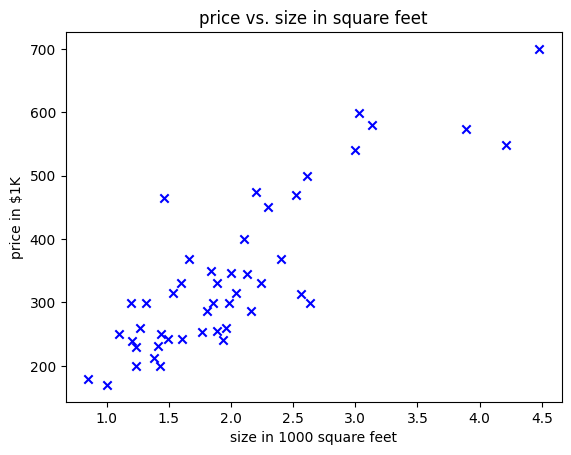

In [269]:
plt.scatter(x_train[:,0], y_train, marker='x', c='b') 
# Set the title
plt.title("price vs. size in square feet")
# Set the y-axis label
plt.ylabel('price in $1K')
# Set the x-axis label
plt.xlabel('size in 1000 square feet')
plt.show()

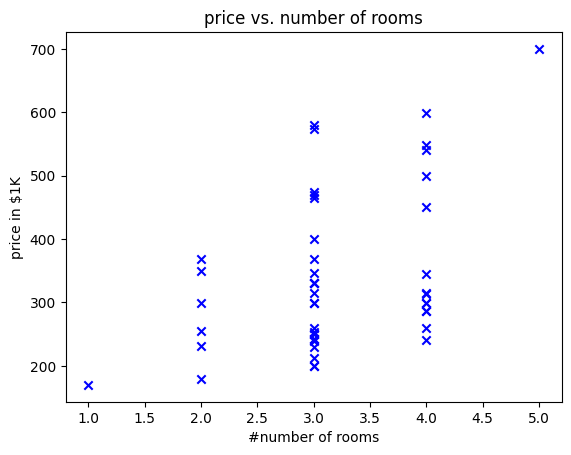

In [270]:
plt.scatter(x_train[:,1], y_train, marker='x', c='b') 
# Set the title
plt.title("price vs. number of rooms")
# Set the y-axis label
plt.ylabel('price in $1K')
# Set the x-axis label
plt.xlabel('#number of rooms')
plt.show()

<a name="5"></a>
## Compute Cost

Gradient descent involves repeated steps to adjust the value of your parameter $(w,b)$ to gradually get a smaller and smaller cost $J(w,b)$.
- At each step of gradient descent, it will be helpful for you to monitor your progress by computing the cost $J(w,b)$ as $(w,b)$ gets updated. 
- In this section, you will implement a function to calculate $J(w,b)$ so that you can check the progress of your gradient descent implementation.

#### Cost function
As you may recall from the lecture, for one variable, the cost function for linear regression $J(w,b)$ is defined as

$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2$$ 

- You can think of $f_{w,b}(x^{(i)})$ as the model's prediction of your restaurant's profit, as opposed to $y^{(i)}$, which is the actual profit that is recorded in the data.
- $m$ is the number of training examples in the dataset

#### Model prediction

- For linear regression with one variable, the prediction of the model $f_{w,b}$ for an example $x^{(i)}$ is representented as:

$$ f_{w,b}(x^{(i)}) = w1x1^{(i)} + w2x2^{(i)} + b$$

This is the equation for a line, with an intercept $b$ and a slope $w$

#### Implementation

Please complete the `compute_cost()` function below to compute the cost $J(w,b)$.

In [271]:
def compute_cost(x, y, w, b): 
    # number of training examples
    m = x.shape[0] 
    cost=0
    
    for i in range(m):
        f_wb = np.dot(x[i],w) + b
        cost += (f_wb - y[i])** 2

    cost /= 2 * m
    return cost

You can check if your implementation was correct by running the following test code:

In [272]:
# Compute cost with some initial values for paramaters w, b
initial_w = np.array([0.0,0.0])
initial_b = 0.0

cost = compute_cost(x_train, y_train, initial_w, initial_b)
print(f'Cost at initial w (zeros): {cost:.3f}')

# Public tests
from public_tests import *
compute_cost_test(compute_cost)

Cost at initial w (zeros): 65591.548
All tests passed!


<a name="6"></a>
## 6 - Gradient descent 

In this section, you will implement the gradient for parameters $w, b$ for linear regression. 

As described in the lecture videos, the gradient descent algorithm is:

$$\begin{align*}& \text{repeat until convergence:} \; \lbrace \newline \; & \phantom {0000} b := b -  \alpha \frac{\partial J(w,b)}{\partial b} \newline       \; & \phantom {0000} w := w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{1}  \; & 
\newline & \rbrace\end{align*}$$

where, parameters $w, b$ are both updated simultaniously and where  
$$
\frac{\partial J(w,b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{2}
$$
$$
\frac{\partial J(w,b)}{\partial w}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) -y^{(i)})x^{(i)} \tag{3}
$$
* m is the number of training examples in the dataset

    
*  $f_{w,b}(x^{(i)})$ is the model's prediction, while $y^{(i)}$, is the target value


You will implement a function called `compute_gradient` which calculates $\frac{\partial J(w)}{\partial w}$, $\frac{\partial J(w)}{\partial b}$ 

In [273]:
def compute_gradient(x, y, w, b):
    # Number of training examples
    m = x.shape[0]
    n = x.shape[1]
    dj_dw = np.zeros(n)
    dj_db = 0.0

    for i in range(m):
        f_wb = np.dot(x[i], w) + b
        error = f_wb-y[i]
        for j in range(n):
            dj_dw[j] += error*x[i,j]
        dj_db += error
        
    dj_dw /= m
    dj_db /= m

    return dj_dw, dj_db


<details>
  <summary><font size="3" color="darkgreen"><b>Click for hints</b></font></summary>
       
    * You can represent a summation operator eg: $h = \sum\limits_{i = 0}^{m-1} 2i$ in code as follows:
     ```python 
    h = 0
    for i in range(m):
        h = h + 2*i
    ```
    
    * In this case, you can iterate over all the examples in `x` using a for loop and for each example, keep adding the gradient from that example to the variables `dj_dw` and `dj_db` which are initialized outside the loop. 

   * Then, you can return `dj_dw` and `dj_db` both divided by `m`.    
    <details>
          <summary><font size="2" color="darkblue"><b> Click for more hints</b></font></summary>
        
    * Here's how you can structure the overall implementation for this function
    ```python 
    def compute_gradient(x, y, w, b): 
        """
        Computes the gradient for linear regression 
        Args:
          x (ndarray): Shape (m,) Input to the model (Population of cities) 
          y (ndarray): Shape (m,) Label (Actual profits for the cities)
          w, b (scalar): Parameters of the model  
        Returns
          dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
          dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
         """
    
        # Number of training examples
        m = x.shape[0]
    
        # You need to return the following variables correctly
        dj_dw = 0
        dj_db = 0
    
        ### START CODE HERE ### 
        # Loop over examples
        for i in range(m):  
            # Your code here to get prediction f_wb for the ith example
            f_wb = 
            
            # Your code here to get the gradient for w from the ith example 
            dj_dw_i = 
        
            # Your code here to get the gradient for b from the ith example 
            dj_db_i = 
     
            # Update dj_db : In Python, a += 1  is the same as a = a + 1
            dj_db += dj_db_i
        
            # Update dj_dw
            dj_dw += dj_dw_i
    
        # Divide both dj_dw and dj_db by m
        dj_dw = dj_dw / m
        dj_db = dj_db / m
        ### END CODE HERE ### 
        
        return dj_dw, dj_db
    ```
    
    If you're still stuck, you can check the hints presented below to figure out how to calculate `f_wb` and `cost`.
    
    <details>
          <summary><font size="2" color="darkblue"><b>Hint to calculate f_wb</b></font></summary>
           &emsp; &emsp; You did this in the previous exercise! For scalars $a$, $b$ and $c$ (<code>x[i]</code>, <code>w</code> and <code>b</code> are all scalars), you can calculate the equation $h = ab + c$ in code as <code>h = a * b + c</code>
          <details>
              <summary><font size="2" color="blue"><b>&emsp; &emsp; More hints to calculate f</b></font></summary>
               &emsp; &emsp; You can compute f_wb as <code>f_wb = w * x[i] + b </code>
           </details>
    </details>
        
    <details>
          <summary><font size="2" color="darkblue"><b>Hint to calculate dj_dw_i</b></font></summary>
           &emsp; &emsp; For scalars $a$, $b$ and $c$ (<code>f_wb</code>, <code>y[i]</code> and <code>x[i]</code> are all scalars), you can calculate the equation $h = (a - b)c$ in code as <code>h = (a-b)*c</code>
          <details>
              <summary><font size="2" color="blue"><b>&emsp; &emsp; More hints to calculate f</b></font></summary>
               &emsp; &emsp; You can compute dj_dw_i as <code>dj_dw_i = (f_wb - y[i]) * x[i] </code>
           </details>
    </details>
        
    <details>
          <summary><font size="2" color="darkblue"><b>Hint to calculate dj_db_i</b></font></summary>
             &emsp; &emsp; You can compute dj_db_i as <code> dj_db_i = f_wb - y[i] </code>
    </details>
        
    </details>

</details>

    


Run the cells below to check your implementation of the `compute_gradient` function with two different initializations of the parameters $w$,$b$.

In [274]:
# Compute and display gradient with w initialized to zeroes
initial_w = np.array([0,0])
initial_b = 0

tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, initial_w, initial_b)
print('Gradient at initial w, b (zeros):', tmp_dj_dw, tmp_dj_db)


Gradient at initial w, b (zeros): [ -764.20912819 -1120.36770213] -340.4126595744679


Now let's run the gradient descent algorithm implemented above on our dataset.

**Expected Output**:
<table>
  <tr>
    <td> <b>Gradient at initial , b (zeros)<b></td>
    <td> -65.32884975 -5.83913505154639</td> 
  </tr>
</table>

In [275]:
# Compute and display cost and gradient with non-zero w
test_w = np.array([50,50])
test_b = 100
tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, test_w, test_b)

print('Gradient at test w, b:', tmp_dj_dw, tmp_dj_db)

Gradient at test w, b: [ 0.60194202 61.20570213] 18.13202127659575


<a name="2.6"></a>
### 2.6 Learning parameters using batch gradient descent 

You will now find the optimal parameters of a linear regression model by using batch gradient descent. Recall batch refers to running all the examples in one iteration.
- You don't need to implement anything for this part. Simply run the cells below. 

- A good way to verify that gradient descent is working correctly is to look
at the value of $J(w,b)$ and check that it is decreasing with each step. 

- Assuming you have implemented the gradient and computed the cost correctly and you have an appropriate value for the learning rate alpha, $J(w,b)$ should never increase and should converge to a steady value by the end of the algorithm.

In [276]:
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    m = x.shape[0]
    J_hist = []
    w_hist = []
    w = copy.deepcopy(w_in)
    b = b_in
    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(x, y, w, b)

        w -= alpha * dj_dw
        b -= alpha * dj_db

        #save the parameter w and the corresponding cost to it
        cost = cost_function(x, y, w, b)
        J_hist.append(cost)
        w_hist.append(w)

        if i % ((num_iters)/50) == 0:
            print(f'Iteration: {i}, Cost: {cost:0.2f}')

    return w, b, J_hist, w_hist

Now let's run the gradient descent algorithm above to learn the parameters for our dataset.

Iteration: 0, Cost: 47591.79
Iteration: 50, Cost: 3562.35
Iteration: 100, Cost: 3198.03
Iteration: 150, Cost: 2928.79
Iteration: 200, Cost: 2729.41
Iteration: 250, Cost: 2581.38
Iteration: 300, Cost: 2471.11
Iteration: 350, Cost: 2388.62
Iteration: 400, Cost: 2326.59
Iteration: 450, Cost: 2279.64
Iteration: 500, Cost: 2243.84
Iteration: 550, Cost: 2216.27
Iteration: 600, Cost: 2194.80
Iteration: 650, Cost: 2177.88
Iteration: 700, Cost: 2164.34
Iteration: 750, Cost: 2153.34
Iteration: 800, Cost: 2144.25
Iteration: 850, Cost: 2136.62
Iteration: 900, Cost: 2130.09
Iteration: 950, Cost: 2124.43
Iteration: 1000, Cost: 2119.44
Iteration: 1050, Cost: 2114.99
Iteration: 1100, Cost: 2110.96
Iteration: 1150, Cost: 2107.29
Iteration: 1200, Cost: 2103.91
Iteration: 1250, Cost: 2100.77
Iteration: 1300, Cost: 2097.85
Iteration: 1350, Cost: 2095.11
Iteration: 1400, Cost: 2092.54
Iteration: 1450, Cost: 2090.12
Iteration: 1500, Cost: 2087.83
Iteration: 1550, Cost: 2085.66
Iteration: 1600, Cost: 2083.61

Text(0.5, 0, 'iteration step')

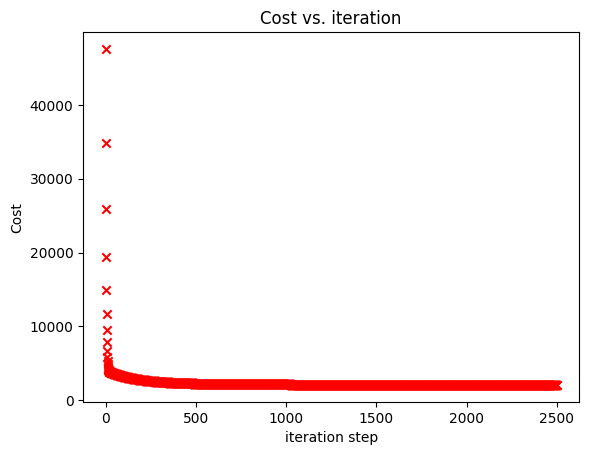

In [277]:
# initialize fitting parameters. Recall that the shape of w is (n,)
initial_w = np.array([0.,0])
initial_b = 0.

# some gradient descent settings
iterations = 2500
alpha = 0.01

w,b,J_history,w_history = gradient_descent(x_train ,y_train, initial_w, initial_b, 
                     compute_cost, compute_gradient, alpha, iterations)
print(f"w,b found by gradient descent: {w}, {b} with minimum cost =",compute_cost(x_train,y_train,w,b))

print(f"b,w found by gradient descent: {b:0.2f},{w} ")
m,_ = x_train.shape
for i in range(m):
    print(f"prediction: {np.dot(x_train[i], w) + b:0.2f}, target value: {y_train[i]}")

plt.scatter(np.arange(iterations),J_history,marker='x',c = 'r')
plt.title("Cost vs. iteration")
plt.ylabel('Cost')             
plt.xlabel('iteration step')

**Expected Output**:
<table>
  <tr>
    <td> <b> w, b found by gradient descent<b></td>
    <td> 1.16636235 -3.63029143940436</td> 
  </tr>
</table>

We will now use the final parameters from gradient descent to plot the linear fit. 

Recall that we can get the prediction for a single example $f(x^{(i)})= wx^{(i)}+b$. 

To calculate the predictions on the entire dataset, we can loop through all the training examples and calculate the prediction for each example. This is shown in the code block below.

In [278]:
m = x_train.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = np.dot(w,x_train[i]) + b

We will now plot the predicted values to see the linear fit.

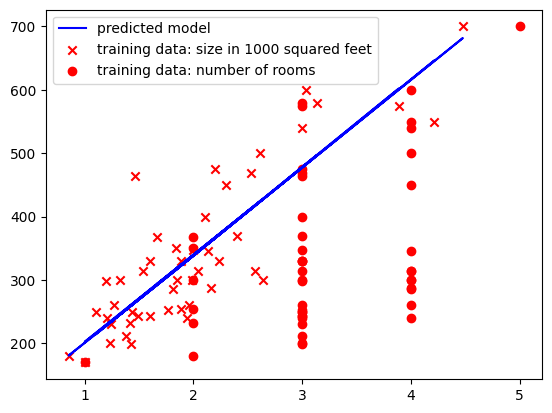

In [279]:
plt.plot(x_train[:,0], predicted, c = 'b',label='predicted model')
plt.scatter(x_train[:,0], y_train, marker='x', c='r',label = 'training data: size in 1000 squared feet')
plt.scatter(x_train[:,1], y_train, marker='o', c='r',label = 'training data: number of rooms')
plt.legend() 

In [280]:
predict1 = np.dot([2.5,3] , w) + b
print('For size of 2500 squared feet, we predict a price of $%.2f' % (predict1*1000))

predict2 = np.dot([4,4] , w) + b
print('For size of 4000 squared feet, we predict a price of $%.2f' % (predict2*1000))


For size of 2500 squared feet, we predict a price of $408830.82
For size of 4000 squared feet, we predict a price of $616277.94
